Sympy and the Jupyter Notebook for engineering calculations
===========================================================

[This notebook](http://nbviewer.jupyter.org/github/alchemyst/Dynamics-and-Control/blob/master/Notebook%20introduction.ipynb) gives an overview of basic Sympy functionality.

In [1]:
from __future__ import division
from __future__ import print_function

In [3]:
import sympy

# Plotting

To plot within the notebook we need to use the following command

In [4]:
%matplotlib inline

**Note:** In newer versions of the notebook, you can also use `%matplotlib notebook` which will allow you to interact with the plot instead of just plotting it.

Notice that the command starts with a `%`, which indicates that this is not a Python command, but rather a command to IPython/Jupyter. These commmands are known as magics. You can learn more about them by typing `%magic`.

SymPy has built-in plotting but it is rather limited

In [5]:
x = sympy.Symbol('x')

In [6]:
polynomial = (2*x**2 + x + 4)

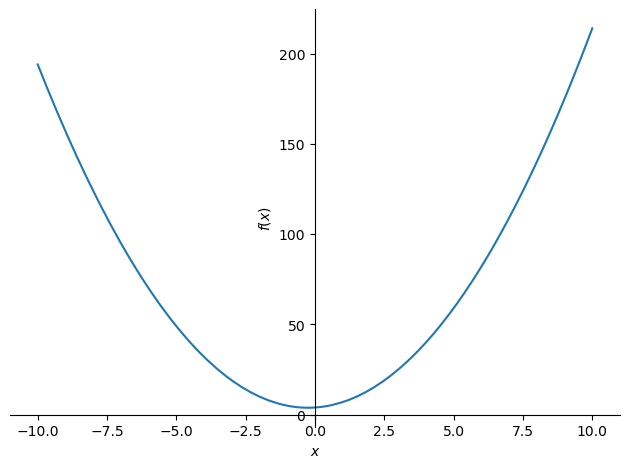

In [7]:
sympy.plot(polynomial)

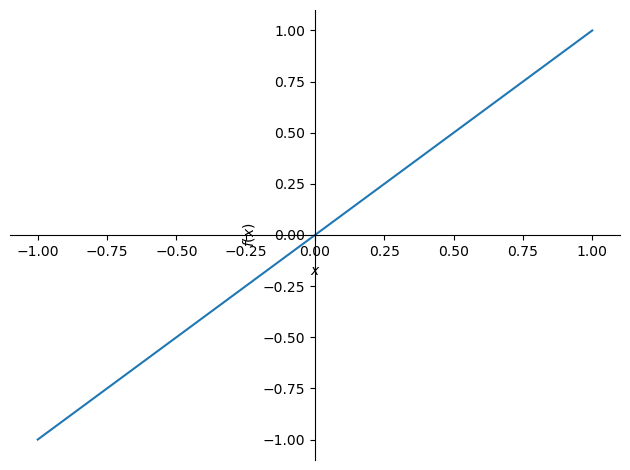

In [8]:
sympy.plot(x, (x, -1, 1))

We prefer to use matplotlib directly so we need to import it

In [9]:
import matplotlib.pyplot as plt
import numpy as numpy

Unfortunately, there is some extra work required to use sympy expressions with numpy arrays.

In [10]:
func = sympy.sin(x)

In [11]:
t = numpy.linspace(-5.0, 5.0, 100)

We may be tempted to evaluate this function for all the values in `t`, but it doesn't work:

In [12]:
func(t)

TypeError: 'sin' object is not callable

We need to create a version of our function which will work correctly with numpy arrays

In [13]:
eqexpression = x**2 + 1

In [14]:
eqexpression(2)

TypeError: 'Add' object is not callable

In [15]:
def eq(x):
    return x**2 + 1

In [16]:
eq(2)

5

In [17]:
eq = sympy.lambdify(x, eqexpression)

In [18]:
x_array = numpy.array([1, 2, 3])

In [19]:
eq(x_array)

array([ 2,  5, 10])

In [20]:
evalfunc = sympy.lambdify(x, func, modules=['numpy'])

In [21]:
evalfunc(t)

array([ 0.95892427,  0.98264051,  0.99633934,  0.99988113,  0.99322975,
        0.97645303,  0.94972199,  0.91330913,  0.86758566,  0.8130177 ,
        0.75016154,  0.67965796,  0.60222569,  0.51865411,  0.42979519,
        0.33655477,  0.23988339,  0.14076655,  0.04021468, -0.06074715,
       -0.1610897 , -0.25979004, -0.35584199, -0.44826636, -0.53612093,
       -0.61851008, -0.69459392, -0.76359681, -0.82481532, -0.87762535,
       -0.92148855, -0.95595775, -0.98068157, -0.99540796, -0.99998679,
       -0.99437139, -0.978619  , -0.95289021, -0.91744731, -0.87265161,
       -0.81895978, -0.75691917, -0.68716224, -0.61040014, -0.52741539,
       -0.43905397, -0.34621667, -0.24984992, -0.1509361 , -0.05048358,
        0.05048358,  0.1509361 ,  0.24984992,  0.34621667,  0.43905397,
        0.52741539,  0.61040014,  0.68716224,  0.75691917,  0.81895978,
        0.87265161,  0.91744731,  0.95289021,  0.978619  ,  0.99437139,
        0.99998679,  0.99540796,  0.98068157,  0.95595775,  0.92

Now we can plot

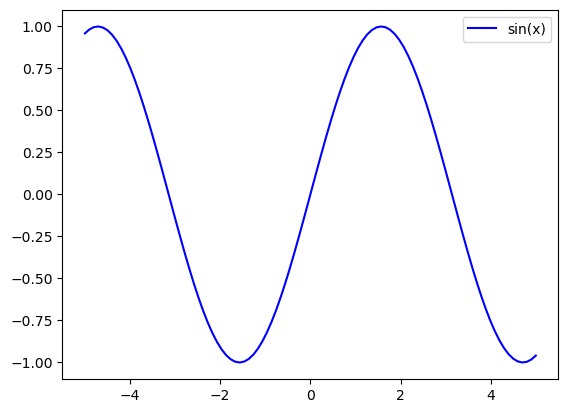

In [22]:
plt.plot(t, evalfunc(t), 'b', label='sin(x)')
plt.legend(loc='best')
plt.show()

We can easily combine this with the first order Taylor approximation around the value 1

In [23]:
taylorapprox = sympy.series(func, x, x0=1, n=2).removeO()
evaltaylor = sympy.lambdify(x, taylorapprox, modules=['numpy'])

Plotted together on the same plot with a marker at the expansion point

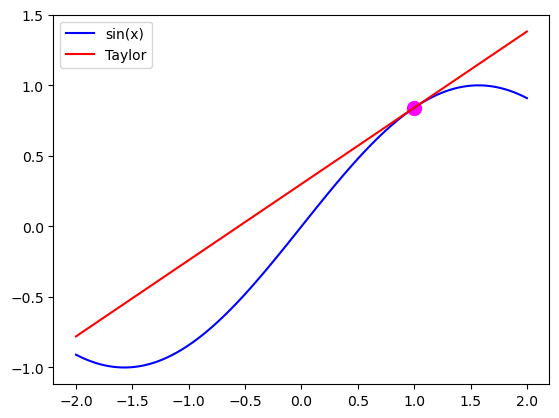

In [24]:
t = numpy.linspace(-2.0, 2.0, 100)
plt.plot(t, evalfunc(t), 'b', label='sin(x)')
plt.plot(t, evaltaylor(t), 'r', label='Taylor')
plt.scatter(1, numpy.sin(1), s=100, color='magenta')
plt.legend(loc='best')
plt.show()

Plotting 2d functions (3D plots)
=====================

We can also plot functions of two variables. For this we require `Axes3d` from `mpl_toolkits.mplot3d`

In [25]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

First we create a function of two variables

In [26]:
x, y = sympy.symbols('x y')
func2 = sympy.sin(x) + sympy.cos(y)
evalfunc2 = sympy.lambdify([x, y], func2, modules=['numpy'])

We evaluate this function over a mesh of points. The `meshgrid` function creates matrices which together contain every combination of points in the argument arrays.

In [27]:
x1 = numpy.linspace(-2.0, 2.0, 20)
y1 = numpy.linspace(-2.0, 2.0, 20)
xx1, yy1 = numpy.meshgrid(x1, y1)
zz = evalfunc2(xx1, yy1)

In [28]:
x = [1, 2, 3]
y = [10, 20, 30]
xx, yy = numpy.meshgrid(x, y)

In [29]:
xx + yy

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [30]:
def plot3d(x, y, z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(x, y, z,  # These must all be 2d arrays
                           rstride=1, cstride=1,  # these arguments specify the grid to draw
                           cmap=cm.cubehelix)  # colormap. See https://www.mrao.cam.ac.uk/~dag/CUBEHELIX/
    fig.colorbar(surf)  # Add a color bar to show what colors map to values

In [31]:
plot3d(xx1, yy1, zz)
plt.show()

TypeError: gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

If we don't plot inline, we can manipulate the plot (rotate, zoom and so on)

In [37]:
%matplotlib notebook

**Note** if you are using `%matplotlib notebook` the graphics will be interactive even in the notebook.

And then plot

In [38]:
plot3d(xx1, yy1, zz)
plt.show()

<IPython.core.display.Javascript object>

TypeError: gca() got an unexpected keyword argument 'projection'

In [34]:
%matplotlib inline

In [35]:
cs = plt.contour(xx1, yy1, zz)
plt.clabel(cs)

<a list of 9 text.Text objects>

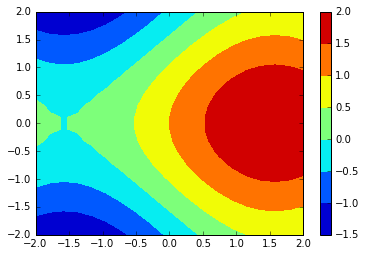

In [77]:
plt.contourf(xx1, yy1, zz)
plt.colorbar()

## Work session 1

Use the information above to do the following tasks:

## Task 1

Plot the left hand side and the right hand side of the following equation as red and green curves, then plot a red dot at the point at which they intersect
$$x^2 = x + 2$$

## Task 2

Use SymPy to solve a CIR mass balance problem: A feed stream containing isomers A and B in equal parts is reacted in a reactor in which $A \rightarrow B$. The reactor obtains 50% conversion. The reactor product is sent to a separator which yields a product stream containing 75 % B and another stream containing 20 % A. The product stream is removed and the other stream is mixed with the feed. What is the composition of the mixed stream entering the separator?
